In [1]:
!pip install tf-explain

     |████████████████████████████████| 28.7MB 7.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tf_explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline

In [3]:
#load pre trained Xception model
model=tf.keras.applications.xception.Xception(weights='imagenet',include_top=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
91889664/91884032 [==============================] - 1s 0us/step


In [4]:
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [5]:
!git clone https://github.com/niazwazir/ClassificationImages.git

Cloning into 'ClassificationImages'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [6]:
!ls

ClassificationImages  sample_data


In [7]:
 cd ClassificationImages

/content/ClassificationImages


In [8]:
!ls

car.jpeg  cobra.jpeg  Elephant.jpeg  lion.jpeg


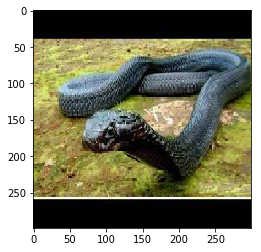

In [9]:
#loading and preprocessing cat image
IMAGE_PATH='./cobra.jpeg'
img=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
img=tf.keras.preprocessing.image.img_to_array(img)
#view the image
plt.imshow(img/255.)

In [10]:
import requests
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()
imgnet_map={v[1]:k for k, v in imgnet_map.items()}
#make model predictions
img=tf.keras.applications.xception.preprocess_input(img)
predictions=model.predict(np.array([img]))
decode_predictions(predictions,top=5)

40960/35363 [==================================] - 0s 0us/step


[[('n01748264', 'Indian_cobra', 0.73371947),
  ('n01737021', 'water_snake', 0.06327038),
  ('n01728572', 'thunder_snake', 0.047600526),
  ('n01728920', 'ringneck_snake', 0.027845502),
  ('n01753488', 'horned_viper', 0.023905873)]]